In [17]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None 

df1 = pd.read_csv("/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

In [18]:
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [19]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [20]:
print(f"The combined dataset contains {df1.shape[0]} instances and {df1.shape[1]} features.")

The combined dataset contains 225745 instances and 79 features.


In [21]:
# Check for missing values
missing_values = df1.isnull().sum().sum()
print(f"The dataset contains {missing_values} missing values.")

The dataset contains 4 missing values.


In [22]:
# Remove instances with missing class labels
df1 = df1[~df1[' Label'].isnull()]

In [23]:
# Remove instances with missing information
df1 = df1.dropna()

In [24]:
# Check for duplicate rows
duplicates = df1.duplicated().sum()
print(f"The dataset1 contains {duplicates} duplicate rows.")

The dataset1 contains 2633 duplicate rows.


In [25]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)  

In [26]:
df1.drop_duplicates(inplace=True)

In [27]:
# Count the occurrences of each class label
class_counts = df1[' Label'].value_counts()
print("Class label counts:")
print(class_counts)

Class label counts:
DDoS      128014
BENIGN     95068
Name:  Label, dtype: int64


In [28]:
# Check the final shape of the DataFrame
print(f"After cleaning, the dataset contains {df1.shape[0]} instances and {df1.shape[1]} features.")

After cleaning, the dataset contains 223082 instances and 79 features.


In [29]:
import math
import matplotlib.pyplot as plt
import numpy as np

def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    nunique = df1.nunique()
    df1 = df1[[col for col in df1 if nunique[col] > 1 and nunique[col] < 80]] 
    nRow, nCol = df1.shape
    columnNames = list(df1)
    nGraphRow = math.ceil((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.suptitle('Column Distribution in CICIDS2017 Dataset Friday DDoS', y=1.02)
    plt.savefig("ColumnDistribution_FridayDDoS.png", dpi=500)
    plt.show()

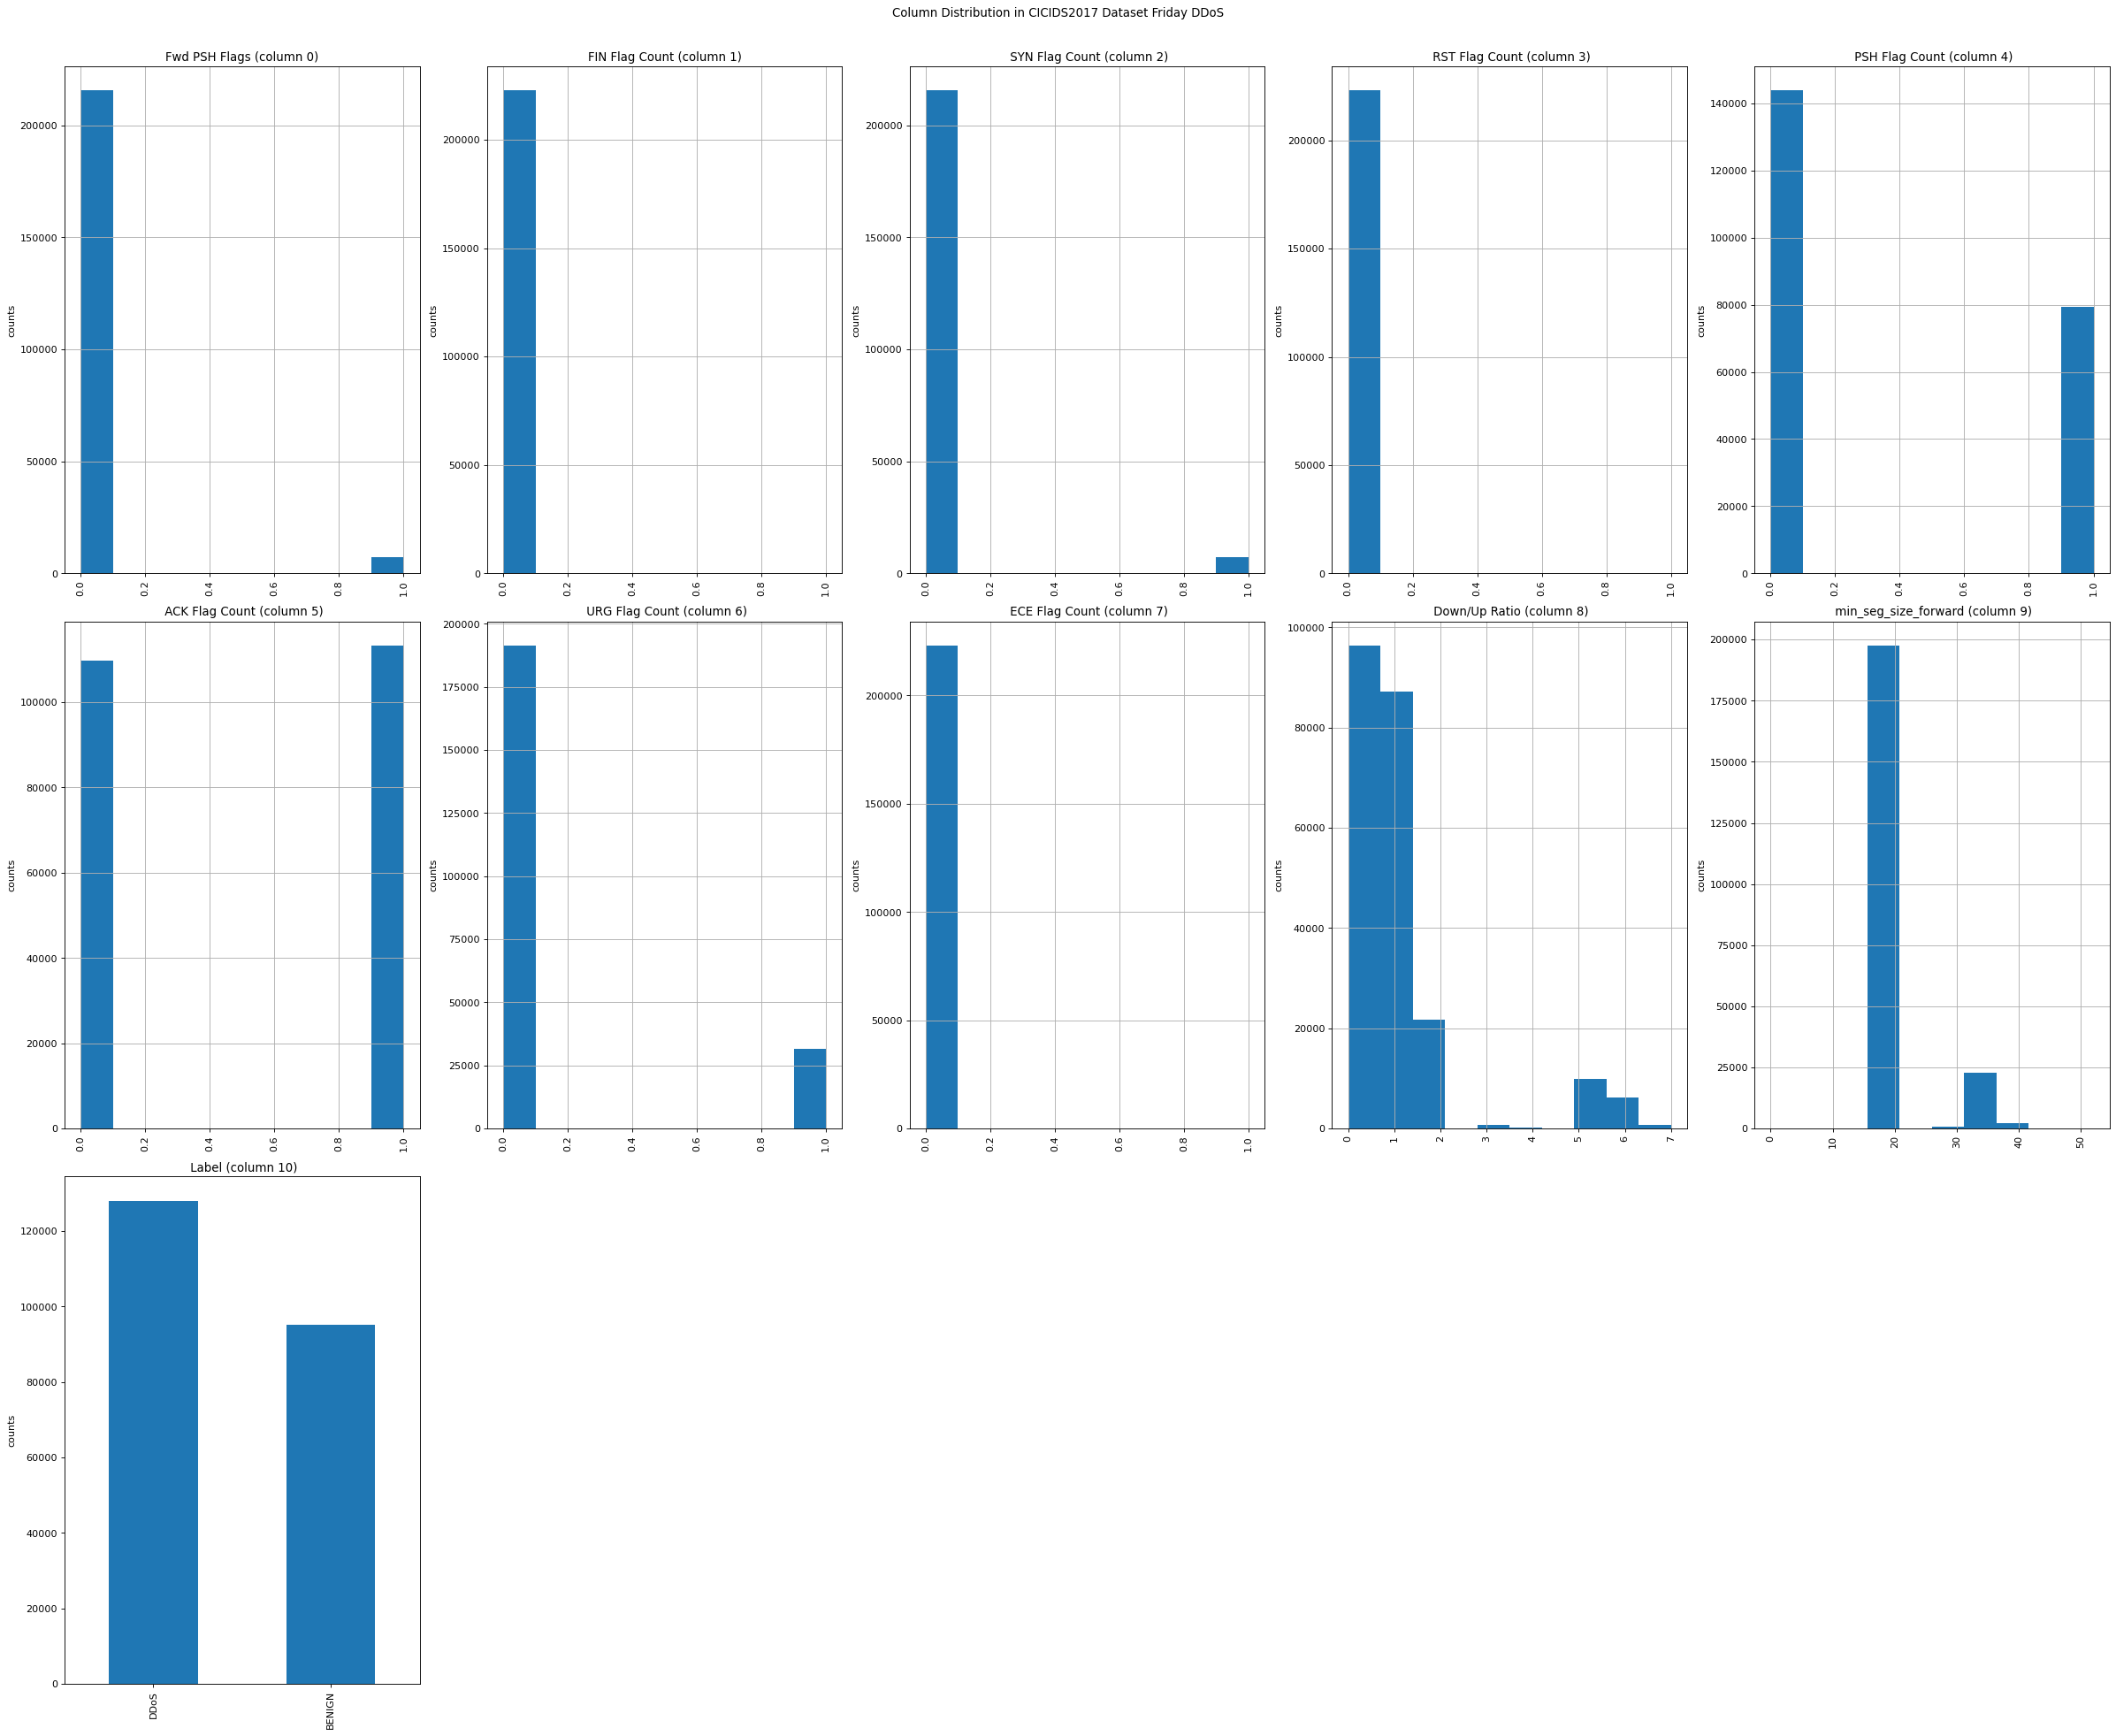

In [30]:
import matplotlib.pyplot as plt # plotting
plotPerColumnDistribution(df1, 20, 5)

/tmp/ipykernel_356/4247777009.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


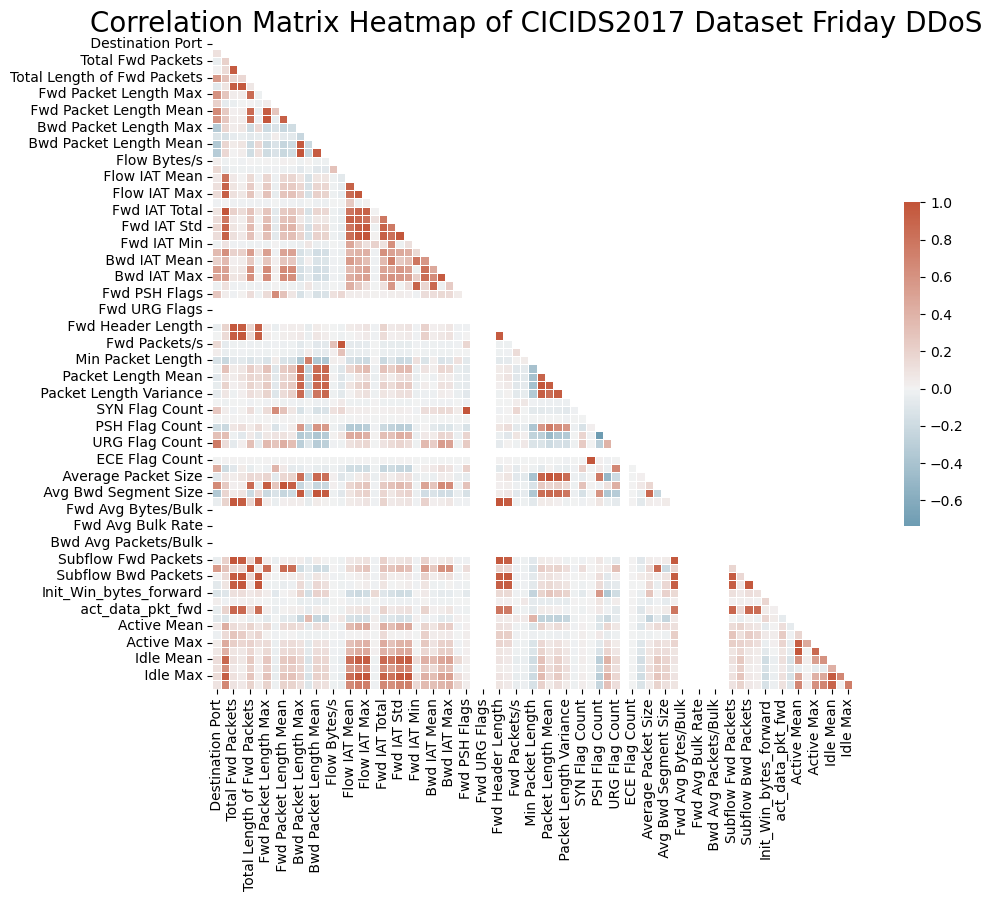

In [31]:
import seaborn as sns

corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap of CICIDS2017 Dataset Friday DDoS', fontsize=20)
plt.tight_layout()  # Adjusts the padding
plt.savefig("Corr_Matrix_Friday_DDoS.png", dpi=500)
plt.show()

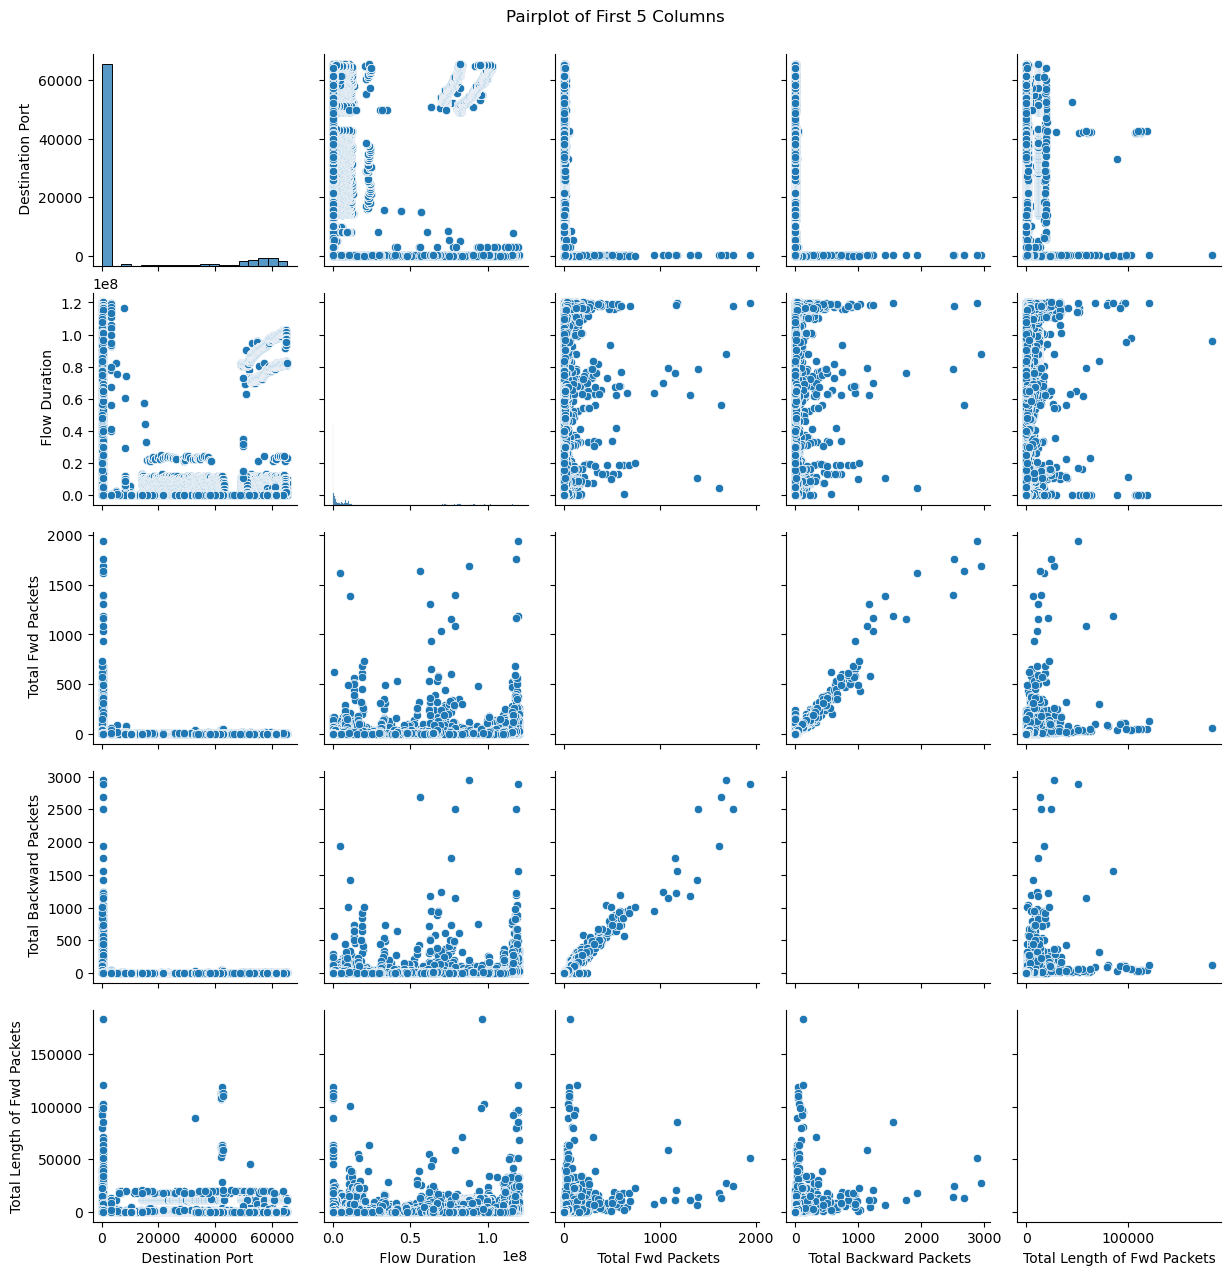

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


columns = df1.columns[:5]

sns.pairplot(df1[columns])
plt.suptitle('Pairplot of First 5 Columns', y=1.02)
plt.savefig('pairplot.png', dpi=500, bbox_inches='tight')

plt.show()



In [33]:
print(df1.columns);

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [35]:
DDoS_data = df1[df1[' Label'] == 'DDoS'];

In [36]:
DDoS_data = DDoS_data.drop([' Label'], axis=1);

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler();
scaled_data = scaler.fit_transform(DDoS_data);

In [38]:
DDoS = DDoS_data.values

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

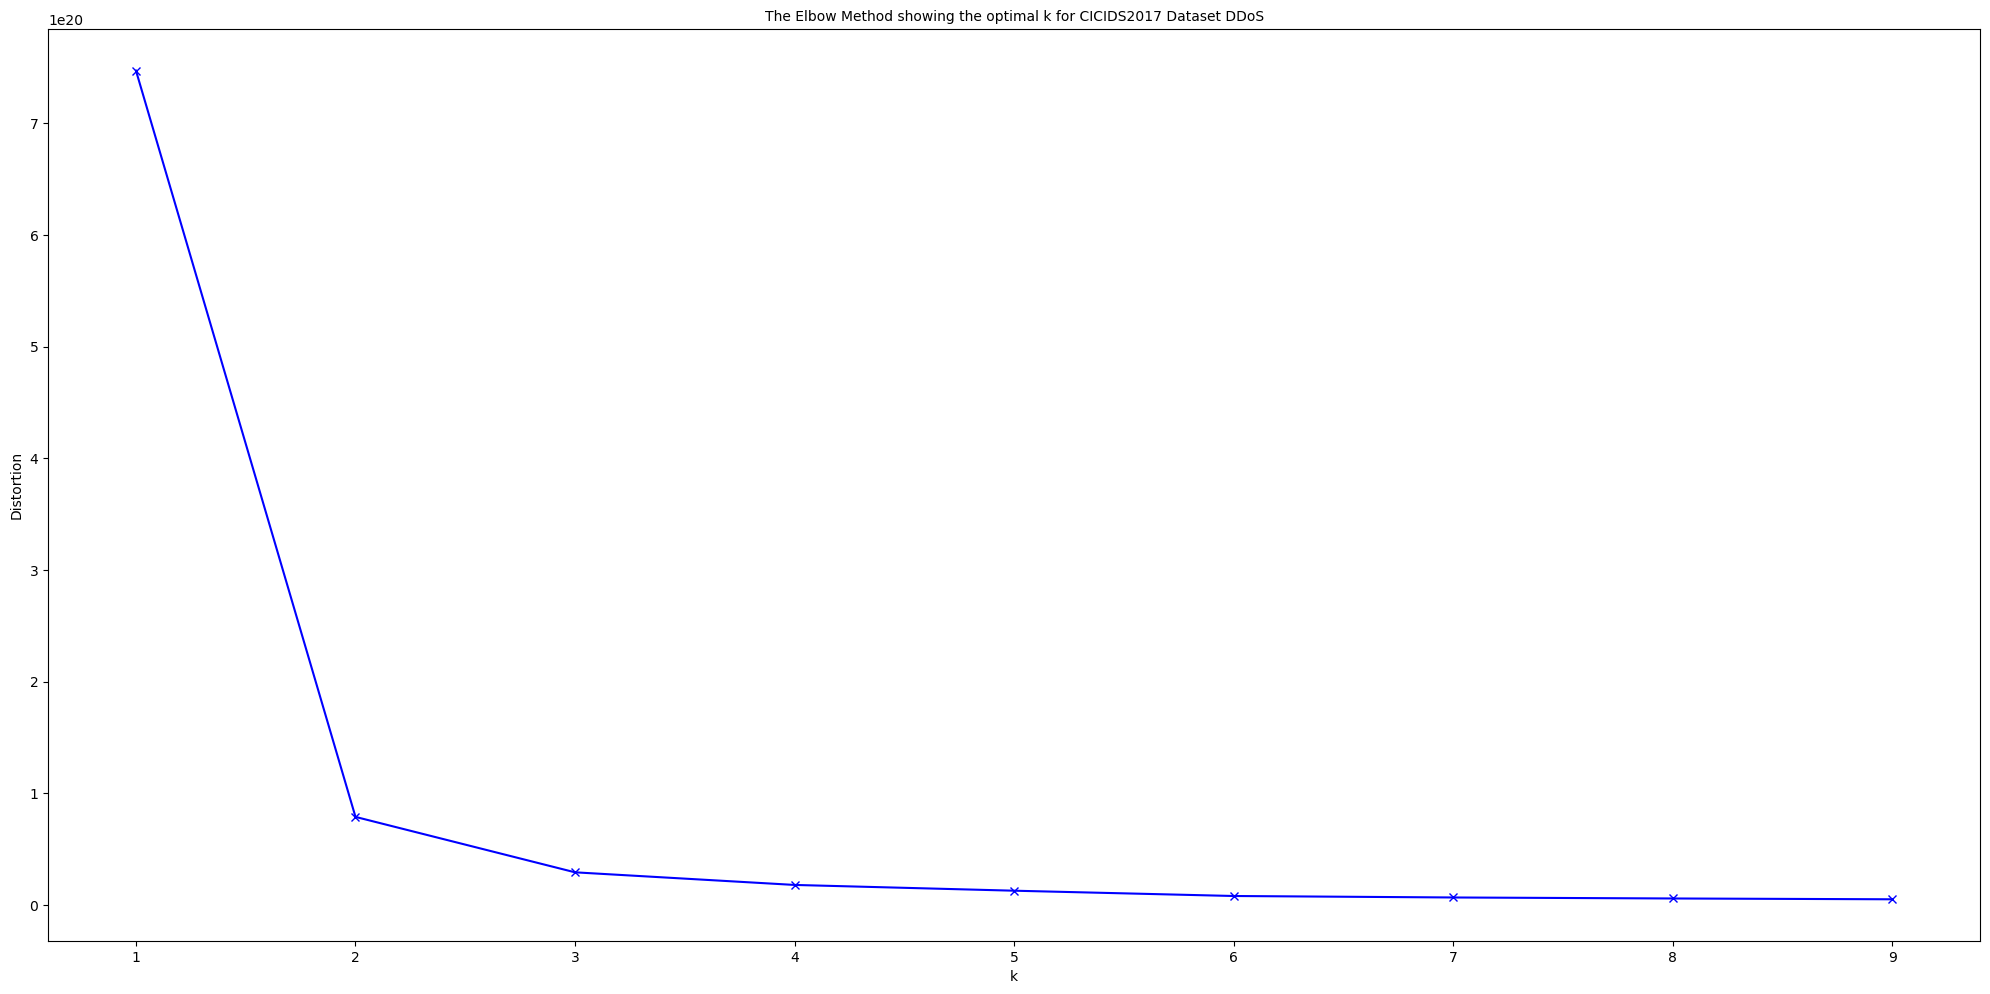

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(DDoS)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(20, 10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.tight_layout()  
plt.title('The Elbow Method showing the optimal k for CICIDS2017 Dataset DDoS', fontsize=10)
plt.savefig('The Elbow Method showing the optimal k for CICIDS2017 Dataset DDoS.png', dpi=500)
plt.show()

In [40]:
k = 1;  
kmeans = KMeans(n_clusters=k, random_state=42);
kmeans.fit(scaled_data);
cluster_labels = kmeans.labels_;

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [42]:
DDoS_data['Cluster'] = cluster_labels;
cluster_means = DDoS_data.groupby('Cluster').mean();

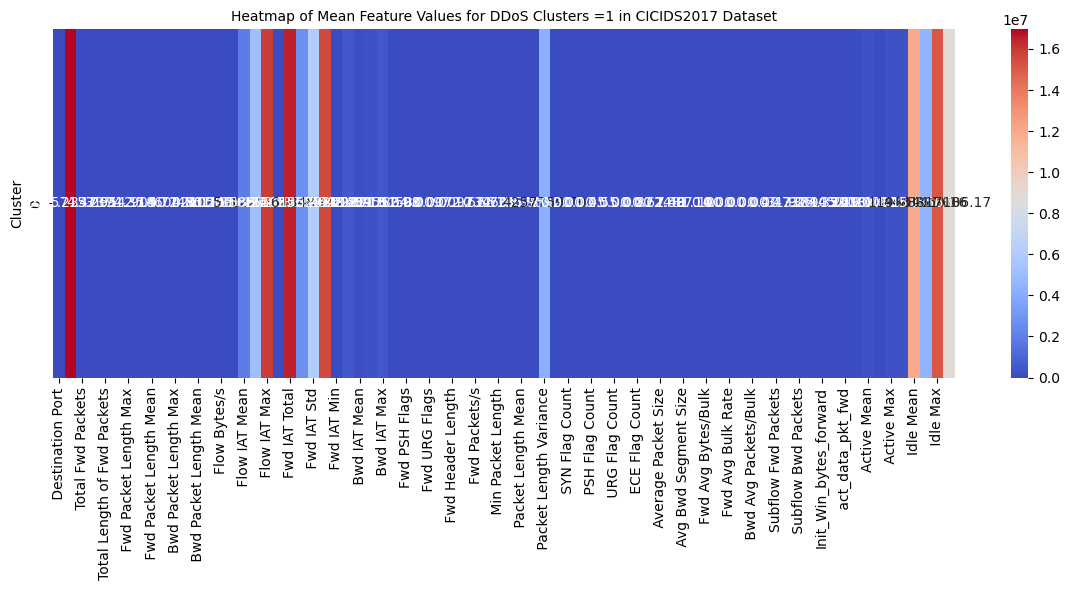

In [43]:
import seaborn as sns
plt.figure(figsize=(12, 6));
sns.heatmap(cluster_means, cmap='coolwarm', annot=True, fmt='.2f');
plt.title('Heatmap of Mean Feature Values for DDoS Clusters =1 in CICIDS2017 Dataset', fontsize=10);
plt.tight_layout()  # Adjusts the padding
plt.savefig("Heatmap_MeanValues_DDoS1.png", dpi=500)
plt.show();

In [44]:
k = 2;  # Number of clusters; you may need to tune this value
kmeans = KMeans(n_clusters=k, random_state=42);
kmeans.fit(scaled_data);
cluster_labels = kmeans.labels_;

In [46]:
DDoS_data['Cluster'] = cluster_labels;
cluster_means = DDoS_data.groupby('Cluster').mean();

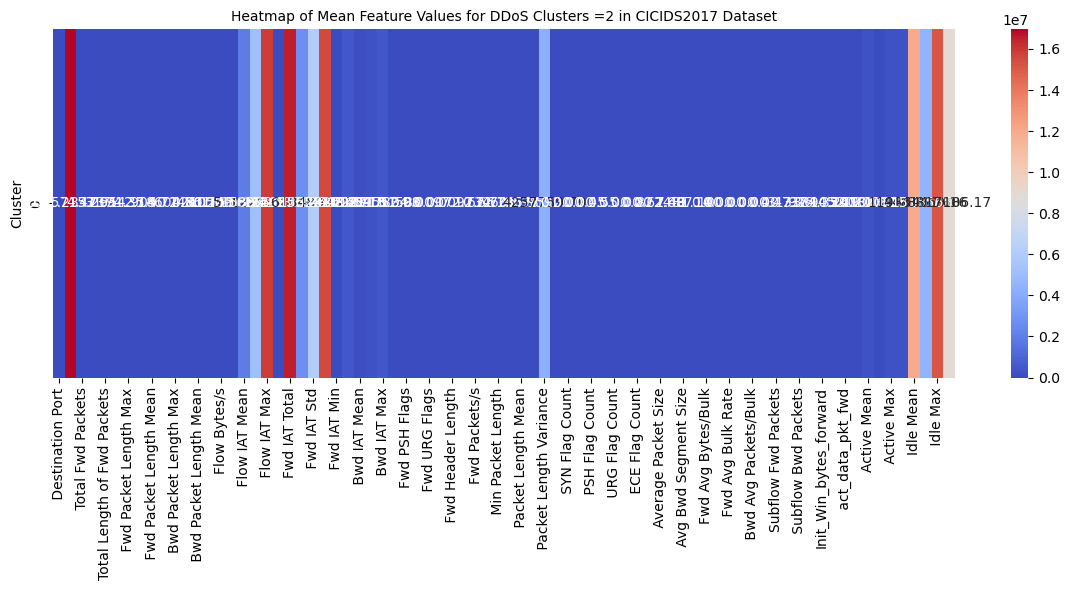

In [47]:
import seaborn as sns
plt.figure(figsize=(12, 6));
sns.heatmap(cluster_means, cmap='coolwarm', annot=True, fmt='.2f');
plt.title('Heatmap of Mean Feature Values for DDoS Clusters =2 in CICIDS2017 Dataset', fontsize=10);
plt.tight_layout()  # Adjusts the padding
plt.savefig("Heatmap_MeanValues_DDoS2.png", dpi=500)
plt.show();

In [48]:
print(df1.columns);

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [49]:
!pip install scikit-learn-extra

In [50]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
data = scaled_data

def evaluate_clusters(model, data):
  model.fit(data)
  
  cluster_labels = model.labels_

  silhouette = silhouette_score(data, cluster_labels)
  
  n_iter = getattr(model, 'n_iter_', None)  
  from collections import Counter
  cluster_counts = Counter(cluster_labels)
  
  return silhouette, n_iter, cluster_counts


k = 2 

# K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_results = evaluate_clusters(kmeans, data)

print("KMeans:")
print("  Silhouette Score:", kmeans_results[0])
print("  Iterations:", kmeans_results[1])  
print("  Elements per Cluster:", kmeans_results[2])


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans:
  Silhouette Score: 0.5340814253402764
  Iterations: 3
  Elements per Cluster: Counter({1: 81351, 0: 46663})


In [1]:
kmeanspp = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=42)
kmeanspp_results = evaluate_clusters(kmeanspp, data)


print("KMeans++:")
print("  Silhouette Score:", kmeanspp_results[0])
print("  Iterations:", kmeanspp_results[1])  
print("  Elements per Cluster:", kmeanspp_results[2])

KMeans++:
  Silhouette Score: 0.5342324012152228
  Iterations: 1
  Elements per Cluster: Counter({1: 81350, 0: 46664})


In [3]:
# KMedoids
kmedoids = KMedoids(n_clusters=k, random_state=42)
kmedoids_results = evaluate_clusters(kmedoids, data)

print("KMedoids:")
print("  Silhouette Score:", kmedoids_results[0])
print("  Iterations:", kmedoids_results[1]) 
print("  Elements per Cluster:", kmedoids_results[2])

KMedoids:
  Silhouette Score: 0.5342324012138472
  Iterations: 3
  Elements per Cluster: Counter({1: 81354, 0: 46660 })
